In [ ]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
from seaborn_qqplot import pplot
from scipy.stats import gamma
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer


In [ ]:
#Grocery TSV File from Amazon S3
#from google.colab import drive
#drive.mount('/content/drive')
#file='/content/drive/MyDrive/AIWR2/groc.tsv'
#df = pd.read_csv(file, sep='\t', error_bad_lines=False, warn_bad_lines=True)
df = pd.read_csv("https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz", delimiter='\t', error_bad_lines=False)
df = df.head(10000)

<ipython-input-3-ec5f8ed3050d>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz", delimiter='\t', error_bad_lines=False)
Skipping line 1925: expected 15 fields, saw 22
Skipping line 1977: expected 15 fields, saw 22
Skipping line 35265: expected 15 fields, saw 22
Skipping line 53357: expected 15 fields, saw 22

Skipping line 68361: expected 15 fields, saw 22
Skipping line 70922: expected 15 fields, saw 22
Skipping line 73503: expected 15 fields, saw 22
Skipping line 85612: expected 15 fields, saw 22
Skipping line 102322: expected 15 fields, saw 22

Skipping line 158341: expected 15 fields, saw 22
Skipping line 162872: expected 15 fields, saw 22
Skipping line 195697: expected 15 fields, saw 22

Skipping line 202916: expected 15 fields, saw 22
Skipping line 203949: expected 15 fields, saw 22


#EDA

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0.0,0.0,N,Y,Five Stars,good,2015-08-31


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [ ]:
print(df.isna().sum())
#preprocessing needed

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          2
review_date          0
dtype: int64


In [ ]:
df = df.dropna(subset=['review_body','star_rating'])

In [ ]:
print(df.isna().sum())

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


###Preprocessing

In [ ]:
# Case Folding
#df['review_body']=df['review_body'].apply(lambda x: x.astype(str).str.lower())
df['review_body']=df['review_body'].apply(str.lower)

TypeError: ignored

In [ ]:
# Removing Punctuations:
df['review_body']=df['review_body'].str.replace(r'[^\w\s]+', '')

In [ ]:
# Remove Whitespace
df['review_body']=df['review_body'].str.strip()

In [ ]:
df['review_body']

0       as a family allergic to wheat dairy eggs nuts ...
1       my favorite nut  creamy crunchy salty and slig...
2       this green tea tastes so good my girlfriend lo...
3       i love melissas brand but this is a great seco...
4                                                    good
                              ...                        
9995    love both the medium and the dark roast always...
9996    always top of the line chocolate sauce  oh rem...
9997                                    thanks  good item
9998    salt pepper and some of this herbe de provence...
9999    very disappointed because there were 6 fingers...
Name: review_body, Length: 9998, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokenization
df["review_body"]=list(map(word_tokenize, df["review_body"]))

In [ ]:
df['review_body']

0       [as, a, family, allergic, to, wheat, dairy, eg...
1       [my, favorite, nut, creamy, crunchy, salty, an...
2       [this, green, tea, tastes, so, good, my, girlf...
3       [i, love, melissas, brand, but, this, is, a, g...
4                                                  [good]
                              ...                        
9995    [love, both, the, medium, and, the, dark, roas...
9996    [always, top, of, the, line, chocolate, sauce,...
9997                                 [thanks, good, item]
9998    [salt, pepper, and, some, of, this, herbe, de,...
9999    [very, disappointed, because, there, were, 6, ...
Name: review_body, Length: 9998, dtype: object

In [ ]:
# Remove Stopwords

stop = stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stop]
    return output

df['review_body']= df['review_body'].apply(lambda x:remove_stopwords(x))

In [ ]:
df['review_body']

0       [family, allergic, wheat, dairy, eggs, nuts, s...
1       [favorite, nut, creamy, crunchy, salty, slight...
2           [green, tea, tastes, good, girlfriend, loves]
3       [love, melissas, brand, great, second, cant, g...
4                                                  [good]
                              ...                        
9995    [love, medium, dark, roast, always, happy, blu...
9996    [always, top, line, chocolate, sauce, oh, remi...
9997                                 [thanks, good, item]
9998    [salt, pepper, herbe, de, provence, ny, strip,...
9999    [disappointed, 6, fingers, 4, red, blobs, gues...
Name: review_body, Length: 9998, dtype: object

In [ ]:
# Lemmetizaton

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]

df['review_body'] =df['review_body'].apply(lambda x:lemmatize_text(x))


In [ ]:
df['review_body']

0       [family, allergic, wheat, dairy, egg, nut, sev...
1       [favorite, nut, creamy, crunchy, salty, slight...
2             [green, tea, taste, good, girlfriend, love]
3       [love, melissa, brand, great, second, cant, ge...
4                                                  [good]
                              ...                        
9995    [love, medium, dark, roast, always, happy, blu...
9996    [always, top, line, chocolate, sauce, oh, remi...
9997                                 [thanks, good, item]
9998    [salt, pepper, herbe, de, provence, ny, strip,...
9999    [disappointed, 6, finger, 4, red, blob, guess,...
Name: review_body, Length: 9998, dtype: object

        customer_id  product_parent  helpful_votes   total_votes
count  1.000000e+04    1.000000e+04   10000.000000  10000.000000
mean   2.708591e+07    4.984227e+08       0.665900      0.869700
std    1.597098e+07    2.860739e+08       4.704157      5.174186
min    1.987700e+04    2.079700e+04       0.000000      0.000000
25%    1.390580e+07    2.571054e+08       0.000000      0.000000
50%    2.566684e+07    4.997653e+08       0.000000      0.000000
75%    4.206221e+07    7.388834e+08       0.000000      1.000000
max    5.309495e+07    9.996552e+08     262.000000    274.000000


'\nNote:\nonly note the star rating, helpful votes and total votes. \n'

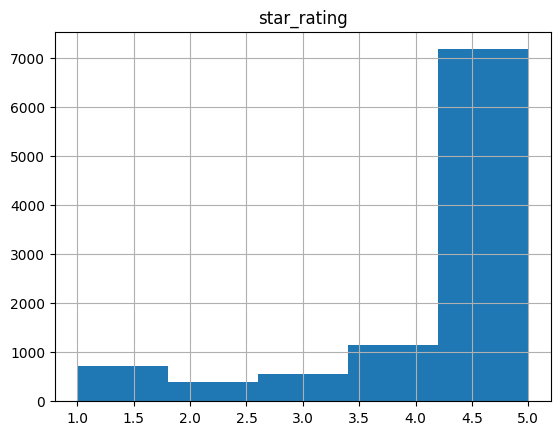

In [ ]:
print(df.describe())
df = df.dropna(subset=['star_rating'])
#print(df['star_rating'].dtype)
#df['star_rating'] = df['star_rating'].astype(float)
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df.hist(column='star_rating', bins=5)
'''
Note:
only note the star rating, helpful votes and total votes. 
'''

Grocery    10000
Name: product_category, dtype: int64


<Axes: >

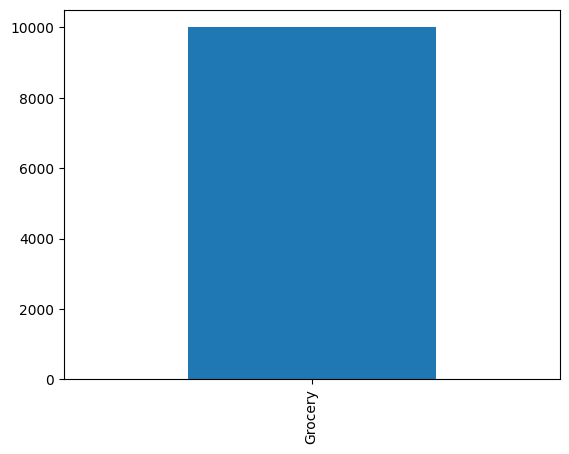

In [ ]:
print(df['product_category'].value_counts())
df['product_category'].value_counts().plot(kind='bar')

                customer_id  product_parent  star_rating  helpful_votes  \
customer_id        1.000000       -0.000750    -0.004756       0.010630   
product_parent    -0.000750        1.000000     0.006327      -0.005495   
star_rating       -0.004756        0.006327     1.000000      -0.078549   
helpful_votes      0.010630       -0.005495    -0.078549       1.000000   
total_votes        0.009480       -0.002349    -0.116607       0.987547   

                total_votes  
customer_id        0.009480  
product_parent    -0.002349  
star_rating       -0.116607  
helpful_votes      0.987547  
total_votes        1.000000  


<ipython-input-11-66e47404f6de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-11-66e47404f6de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


'\n-1: perfectly negative correlation\n0: no correlation\n1: perfect correlation\n\n'

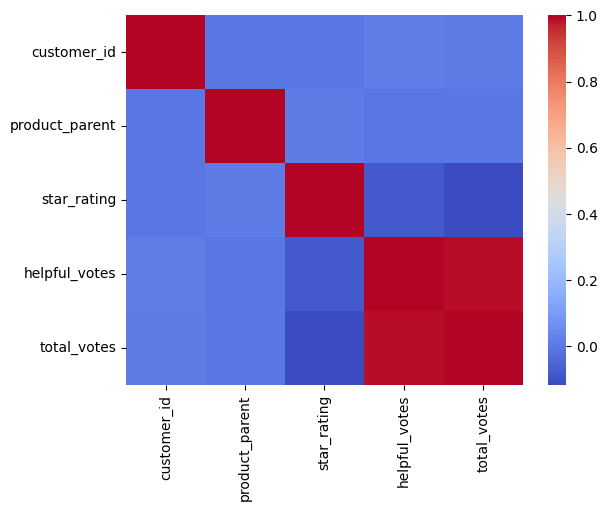

In [ ]:
print(df.corr())
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm')
'''
-1: perfectly negative correlation
0: no correlation
1: perfect correlation

'''

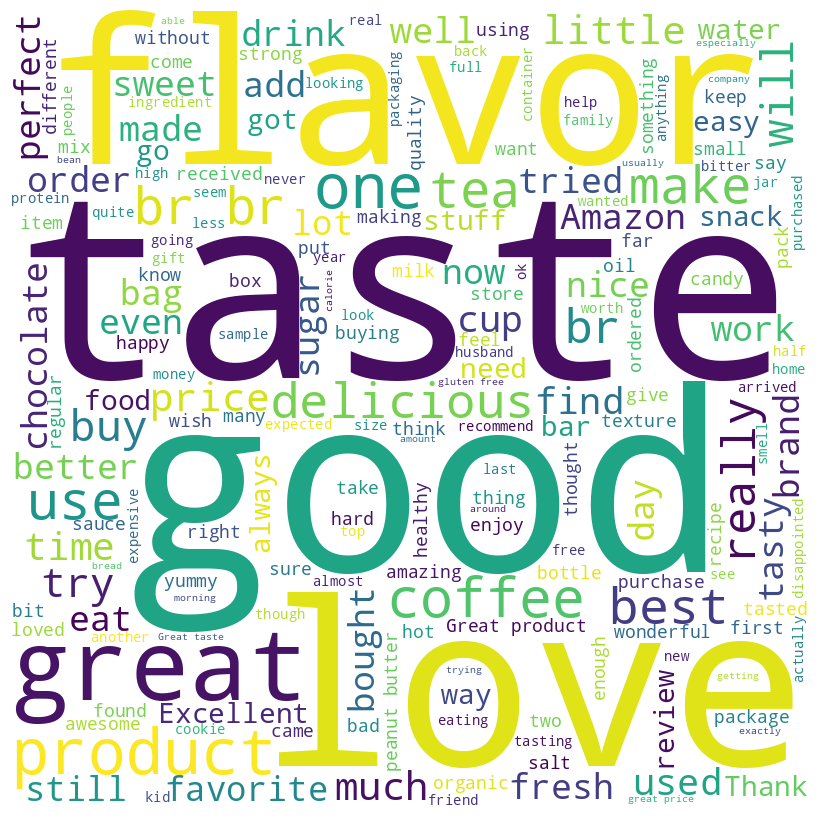

In [ ]:
# Combine all review text into a single string
reviews = ' '.join(df['review_body'].dropna().tolist())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(reviews)

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment scores for each review
df['review_body'].dropna(inplace=True)
df['sentiment'] = df['review_body'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
# Plot a histogram of the sentiment scores
df.hist(column='sentiment', bins=30)
'''
The VADER tool calculates four scores: positive, negative, neutral, and compound, with the compound score being a normalized weighted composite score that ranges from -1 (most negative) to +1 (most positive).
The histogram of the sentiment scores can provide insight into the overall sentiment of the reviews. If the distribution of sentiment scores is skewed towards positive values, it indicates that the reviews are generally positive in sentiment. Conversely, if the distribution is skewed towards negative values, it indicates that the reviews are generally negative in sentiment. 
'''

LookupError: ignored

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Tokenize the review text
tokenized_reviews = [simple_preprocess(review) for review in df['review_body'].dropna()]

# Create a dictionary of the tokens
dictionary = Dictionary(tokenized_reviews)

# Convert the tokenized reviews into bag-of-words vectors
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Train an LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Print the top words in each topic
for topic in lda_model.print_topics():
    print(topic)

(0, '0.029*"the" + 0.023*"for" + 0.021*"like" + 0.020*"not" + 0.020*"it" + 0.019*"but" + 0.017*"and" + 0.017*"taste" + 0.017*"good" + 0.015*"of"')
(1, '0.041*"and" + 0.035*"the" + 0.034*"to" + 0.026*"these" + 0.025*"them" + 0.025*"of" + 0.023*"they" + 0.021*"are" + 0.020*"my" + 0.019*"for"')
(2, '0.033*"the" + 0.031*"and" + 0.020*"of" + 0.018*"in" + 0.018*"with" + 0.016*"to" + 0.014*"this" + 0.013*"it" + 0.012*"delicious" + 0.012*"but"')
(3, '0.143*"great" + 0.041*"product" + 0.028*"this" + 0.023*"and" + 0.020*"it" + 0.018*"taste" + 0.018*"love" + 0.016*"price" + 0.012*"is" + 0.011*"tastes"')
(4, '0.055*"the" + 0.033*"and" + 0.028*"it" + 0.025*"to" + 0.021*"of" + 0.020*"this" + 0.019*"is" + 0.014*"for" + 0.014*"in" + 0.014*"that"')
(5, '0.045*"the" + 0.024*"and" + 0.020*"to" + 0.016*"of" + 0.016*"in" + 0.016*"it" + 0.015*"is" + 0.014*"this" + 0.012*"but" + 0.012*"flavor"')
(6, '0.046*"it" + 0.040*"the" + 0.029*"and" + 0.023*"this" + 0.023*"is" + 0.021*"to" + 0.013*"love" + 0.012*"in" +

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marketplace        10000 non-null  object 
 1   customer_id        10000 non-null  int64  
 2   review_id          10000 non-null  object 
 3   product_id         10000 non-null  object 
 4   product_parent     10000 non-null  int64  
 5   product_title      10000 non-null  object 
 6   product_category   10000 non-null  object 
 7   star_rating        10000 non-null  int64  
 8   helpful_votes      10000 non-null  float64
 9   total_votes        10000 non-null  float64
 10  vine               10000 non-null  object 
 11  verified_purchase  10000 non-null  object 
 12  review_headline    10000 non-null  object 
 13  review_body        9998 non-null   object 
 14  review_date        10000 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
ratings_count=df.star_rating.value_counts(sort=False)
ratings_count

5    7183
2     392
1     729
4    1147
3     549
Name: star_rating, dtype: int64

In [ ]:
print("Total number of Users   :", len(np.unique(df.customer_id)))
print("Total number of Products  :", len(np.unique(df.product_id)))

Total number of Users   : 7918
Total number of Products  : 7919


<Axes: ylabel='star_rating'>

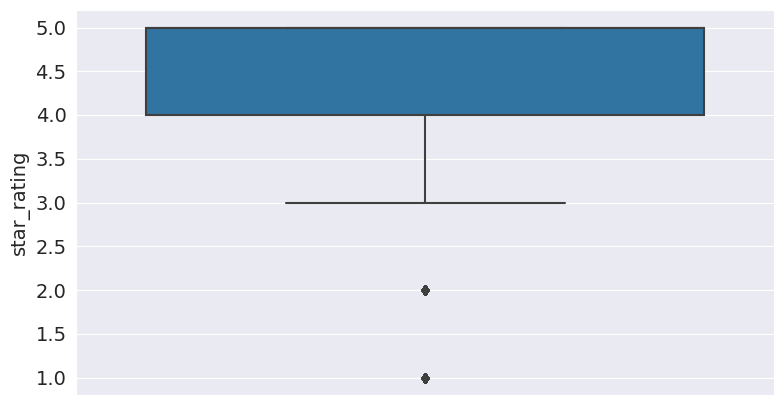

In [ ]:
sns.boxplot(y='star_rating',data=df)

In [ ]:
#Check the top 10 users based on ratings
df.drop_duplicates(inplace=True)
most_rated=df.groupby('customer_id').size().sort_values(ascending=False)
print('Top 10 users based on ratings: \n',most_rated[:10])

Top 10 users based on ratings: 
 customer_id
20674418    18
13403431    17
36290808    15
37599324    14
34247947    14
30716947    13
1383733     13
11375470    13
12046133    12
1535682     12
dtype: int64


In [ ]:
counts=df.customer_id.value_counts()
df1_final=df[df.customer_id.isin(counts[counts>=5].index)]
print('Number of users who have rated 10 or more items =', len(df1_final))
print('Number of unique users in the final data = ', df1_final['customer_id'].nunique())
print('Number of unique products in the final data = ', df1_final['product_id'].nunique())

Number of users who have rated 10 or more items = 774
Number of unique users in the final data =  116
Number of unique products in the final data =  748


#**Negihborhood based Collabarative Filtering**

##1) Memory Based Collabarative Filtering

 **i) User-based collaborative filtering**




In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195791 sha256=b298eee82462216e25c1b2c5c3e1dc56be43658ae26577d0e7686e315bb31827
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
import surprise
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
#reader = Reader(line_format='user item rating', sep='\t', rating_scale=(1, 5))
# Split the dataset into training and testing sets
# Convert the Pandas DataFrame to a Surprise Dataset object
reader = surprise.Reader(rating_scale=(1, 5))
data = surprise.Dataset.load_from_df(df[['customer_id', 'product_id', 'star_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
# Define the user-based collaborative filtering algorithm
algo = KNNBasic(k=50, sim_options={'user_based': True})

# Train the algorithm on the training set
algo.fit(trainset)

# Test the algorithm on the testing set
predictions = algo.test(testset)

# Evaluate the algorithm using RMSE and MAE metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f'RMSE: {rmse:.3f}, MAE: {mae:.3f}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2091
MAE:  0.9128
RMSE: 1.209, MAE: 0.913


In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import itertools

# Keep only the necessary columns
df1 = df[['customer_id', 'product_id', 'star_rating']]

# Create a pivot table to get a sparse matrix of item ratings by users
ratings_matrix = df1.pivot(index='product_id', columns='customer_id', values='star_rating').fillna(0)

# Convert the ratings matrix to a sparse matrix
ratings_sparse = csr_matrix(ratings_matrix.values)

# Compute the BM25 weights for the ratings sparse matrix
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(ratings_sparse)
tfidf_bm25 = tfidf.multiply(2.5 / (1.5 + tfidf.sum(axis=0)))

# Compute the pairwise cosine similarity between items using the BM25 weights
item_similarities = cosine_similarity(tfidf_bm25.T)

# Get the indices of the top-k similar items for each item
k = 5
top_k_similar_items = np.argsort(-item_similarities)[:, 1:k+1]

# Compute the item-based predictions for each user
item_ratings = ratings_matrix.T.dot(item_similarities)
item_ratings_norm = np.array([np.abs(item_ratings[i]).sum() for i in range(item_ratings.shape[0])])
item_ratings_norm[item_ratings_norm == 0] = 1e-10
item_ratings /= item_ratings_norm[:, np.newaxis]

# Select the top-k recommended items for each user
k = 5
top_k_items = np.argsort(-item_ratings)[:, :k]

# Print the top-k recommended items for each user
user_ids = ratings_matrix.columns
for i, user_id in enumerate(user_ids):
    top_items = ratings_matrix.index[top_k_items[i]]
    print(f"Top {k} items for user {user_id}: {', '.join(top_items)}")


ValueError: ignored

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 27.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import itertools

# Keep only the necessary columns
df1 = df[['customer_id', 'product_id', 'star_rating']]

# Create a pivot table to get a sparse matrix of item ratings by users
ratings_matrix = df1.pivot(index='product_id', columns='customer_id', values='star_rating').fillna(0)

# Convert the ratings matrix to a sparse matrix
ratings_sparse = csr_matrix(ratings_matrix.values)

# Compute the BM25 weights for the ratings sparse matrix
import implicit

# initialize a model
model = implicit.als.AlternatingLeastSquares(factors=50)

# train the model on a sparse matrix of item/user/confidence weights
model.fit(ratings_sparse)

# recommend items for a user
user_items = ratings_sparse.T.tocsr()
recommendations = model.recommend(df.customer_id, user_items)

# find related items
related = model.similar_items(df.product_id)

# Compute the pairwise cosine similarity between items using the BM25 weights
item_similarities = cosine_similarity(tfidf_bm25.T)

# Get the indices of the top-k similar items for each item
k = 5
top_k_similar_items = np.argsort(-item_similarities)[:, 1:k+1]

# Compute the item-based predictions for each user
item_ratings = ratings_matrix.T.dot(item_similarities)
item_ratings_norm = np.array([np.abs(item_ratings[i]).sum() for i in range(item_ratings.shape[0])])
item_ratings_norm[item_ratings_norm == 0] = 1e-10
item_ratings /= item_ratings_norm[:, np.newaxis]

# Select the top-k recommended items for each user
k = 5
top_k_items = np.argsort(-item_ratings)[:, :k]

# Print the top-k recommended items for each user
user_ids = ratings_matrix.columns
for i, user_id in enumerate(user_ids):
    top_items = ratings_matrix.index[top_k_items[i]]
    print(f"Top {k} items for user {user_id}: {', '.join(top_items)}")


NameError: ignored

In [ ]:
'''
accuracy check 


from surprise import accuracy
from surprise.model_selection import train_test_split

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model on the training set using item-based collborative filtering with BM25 similarity
model = KNNBaseline(sim_options={'name': 'BM25', 'user_based': False})
model.fit(trainset)

# Predict the ratings for the test set
predictions = model.test(testset)

# Calculate RMSE and MAE between predicted and actual ratings in the test set
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

'''

'\naccuracy check \n\n\nfrom surprise import accuracy\nfrom surprise.model_selection import train_test_split\n\n# Split the data into training and testing sets\ntrainset, testset = train_test_split(data, test_size=0.2)\n\n# Train the model on the training set using item-based collborative filtering with BM25 similarity\nmodel = KNNBaseline(sim_options={\'name\': \'BM25\', \'user_based\': False})\nmodel.fit(trainset)\n\n# Predict the ratings for the test set\npredictions = model.test(testset)\n\n# Calculate RMSE and MAE between predicted and actual ratings in the test set\nrmse = accuracy.rmse(predictions)\nmae = accuracy.mae(predictions)\n\nprint(f"RMSE: {rmse:.4f}")\nprint(f"MAE: {mae:.4f}")\n\n'

In [ ]:
# cf using naive bayes for model based